## USA Baby Names 1880-2016

The United States Social Security Administration maintains an interesting data set of (almost) all names given to babies born in the United States, by sex and year, going back to 1880. This data set is available at [https://www.ssa.gov/oact/babynames/limits.html](https://www.ssa.gov/oact/babynames/limits.html)

This data set is interesting and fun to explore and we'll use it as the basis of a simple data analysis project with the end goal of creating a script that can be called to output a plot of a single name's popularity over time.

To start, we will assume that this dataset has already been downloaded and <font color="red"><b> unzipped </b></font> into a subfolder called names.

In [1]:
import platform # some of the subsequent code depends on operating system

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set up some variables for use later
dataset_path_windows = 'data\\names'   # Windows
dataset_path_nix = './data/names'   # UNIX, Linux

begin_year = 1880
end_year = 2016

In [3]:
# The subsequent non-python commands depend on your operating system
platform.system()  # show name of operating system

'Darwin'

In [4]:
if platform.system()=='Windows':
    dataset_path = dataset_path_windows
else:
    dataset_path = dataset_path_nix

Let's first examine the data files to see what we're working with. Note the `type` command on Windows is equivalent to `cat` on MacOS or Linux.

In [5]:
# List files folder using the inbuilt commands of your operating system
# jupyter notebooks can call the operating system by using the exclamation mark
if platform.system()=='Windows':
    !dir $dataset_path
else:
    !ls $dataset_path

NationalReadMe.pdf yob1914.txt        yob1949.txt        yob1984.txt
yob1880.txt        yob1915.txt        yob1950.txt        yob1985.txt
yob1881.txt        yob1916.txt        yob1951.txt        yob1986.txt
yob1882.txt        yob1917.txt        yob1952.txt        yob1987.txt
yob1883.txt        yob1918.txt        yob1953.txt        yob1988.txt
yob1884.txt        yob1919.txt        yob1954.txt        yob1989.txt
yob1885.txt        yob1920.txt        yob1955.txt        yob1990.txt
yob1886.txt        yob1921.txt        yob1956.txt        yob1991.txt
yob1887.txt        yob1922.txt        yob1957.txt        yob1992.txt
yob1888.txt        yob1923.txt        yob1958.txt        yob1993.txt
yob1889.txt        yob1924.txt        yob1959.txt        yob1994.txt
yob1890.txt        yob1925.txt        yob1960.txt        yob1995.txt
yob1891.txt        yob1926.txt        yob1961.txt        yob1996.txt
yob1892.txt        yob1927.txt        yob1962.txt        yob1997.txt
yob1893.txt        yob1928.txt    

In [6]:
# Read a single file into a python variable and print out the first five lines
if platform.system()=='Windows':
    sample = !type $dataset_path\\yob1880.txt
else:
    sample = !cat $dataset_path/yob1880.txt

sample[:5]

['Mary,F,7065',
 'Anna,F,2604',
 'Emma,F,2003',
 'Elizabeth,F,1939',
 'Minnie,F,1746']

We will need a function to read in all of these files one by one and combine them into a single dataframe. Note that Pandas will correctly intepret the paths to the files, irrespectively of whether they were formulated in a Windows or Unix-based manner.

In [7]:
def create_dataframe(begin_year, end_year):
    columns = ('name', 'sex', 'births')
    pieces = []
    for year in range(begin_year, end_year + 1):
        filename = '%s/yob%d.txt' % (dataset_path, year)
        piece = pd.read_csv(filename, names=columns)
        piece['year'] = year
        pieces.append(piece)
        
    return pd.concat(pieces, ignore_index=True)

In [8]:
# Now call our new function to get the dataset loaded into a Dataframe.
df = create_dataframe(begin_year, end_year)
df.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


Now lets explore this data a little, first, how many records do we have?

In [9]:
len(df)

1891894

Now lets look at a specific name, lets make a new dataframe that includes only your name and look at the first 5 rows

In [15]:
#mostly good if there are multiple names like alex/alexander
#erin = df[df.name.isin(['Erin'])]
erin = df[df.name == 'Erin']
erin.head()

,name,sex,births,year
18848,Erin,F,5,1888
21338,Erin,F,6,1889
23702,Erin,F,9,1890
35406,Erin,F,5,1894
37798,Erin,F,11,1895


Lets now look at some stats for your name

In [16]:
erin.describe()

,births,year
count,206.000000,206.000000
mean,1557.747573,1962.257282
std,3165.721439,33.973689
min,5.000000,1888.000000
25%,18.250000,1938.250000
50%,89.000000,1965.000000
75%,1163.000000,1990.750000
max,14838.000000,2016.000000


When was your name at peak popularity?

In [21]:
#can't just do erin.max() because will just grab the max from both columns
erin[erin.births == erin.births.max()]

,name,sex,births,year
922422,Erin,F,14838,1983


How can we convert the raw birth numbers into percent of births that year? Lets make a new column for that

In [32]:
#need to get the total number of births in a year
#need to add the ['births'] even though it works without because births is the only column that you can sum in this
#dataset, but might not be same in other datasets
year_births = df.groupby('year')['births'].sum().reset_index()
year_births.head()

#to add this data frame to your data frame:
newerin = erin.merge(year_births, how = 'outer', on = 'year', suffixes = ['_erin','_total'])
newerin.head()

#new column that is the percentages
newerin['percentage'] = newerin['births_erin']/newerin['births_total']
newerin.head()

,name,sex,births_erin,year,births_total,percentage
0,Erin,F,5.0,1888,299475,0.000017
1,Erin,F,6.0,1889,288947,0.000021
2,Erin,F,9.0,1890,301401,0.000030
3,Erin,F,5.0,1894,338691,0.000015
4,Erin,F,11.0,1895,351023,0.000031


Wow, some of these percentages are really small, why dont we change it to number of births of a given name per million births that year

In [35]:
newerin['per million'] = newerin['percentage']*10**6
newerin.head()

,name,sex,births_erin,year,births_total,percentage,per million
0,Erin,F,5.0,1888,299475,0.000017,16.695884
1,Erin,F,6.0,1889,288947,0.000021,20.765054
2,Erin,F,9.0,1890,301401,0.000030,29.860551
3,Erin,F,5.0,1894,338691,0.000015,14.762719
4,Erin,F,11.0,1895,351023,0.000031,31.336978


Why dont we make a graph of how common your name is over the years

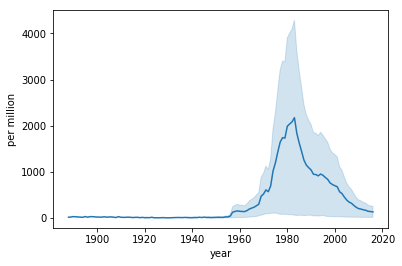

In [36]:
sns.lineplot(x = 'year', y = 'per million', data = newerin)
#shading is from male and female

If your name is like mine, there is actually a bunch of shading indicating variance, why would that be?


Its because this data is also split on gender, so there is a chance to have the name listed twice because of gender. The gender split could be interesting though, so lets look at it graphically

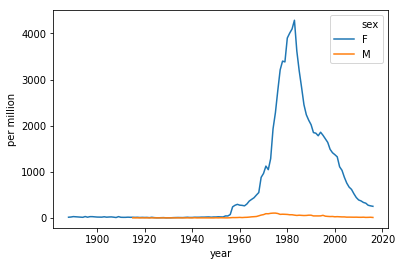

In [37]:
sns.lineplot(x = 'year', y = 'per million', hue = 'sex', data = newerin)

There is a actually a really good breakdown of different name trends by Tim Urban at https://waitbutwhy.com/2013/12/how-to-name-baby.html

so lets look quickly at a couple of the interesting trends he found with our code

### Name Fads

A name fad is when a specific name gets really popular for a specific generation, causing a person's age to be reasonable guessed based on their name alone.

Check out Jennifer, Ashley, or Shirley for some examples

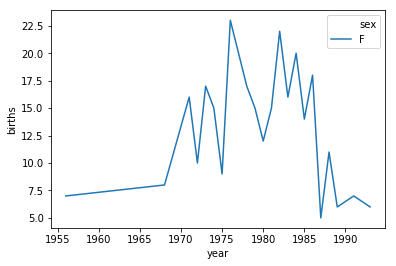

In [42]:
erin = df[df.name == 'Jenniefer']

sns.lineplot(x = 'year', y = 'births', hue = 'sex',data = erin)

### Gender Takeovers

Sometimes a name that is uncommon but solely one gender becomes extremely popular for the other gender, to the point that the original gender stops using it

Check out Lynn or Aubrey

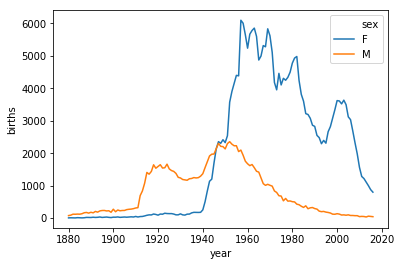

In [41]:
erin = df[df.name == 'Leslie']

sns.lineplot(x = 'year', y = 'births', hue = 'sex',data = erin)